In [14]:
import pyod
from pyod.models import *   # kNN detector
from pyod.models.vae import VAE   # kNN detector
from pyod.utils import *   # kNN detector
from pyod.utils.example import *   # kNN detector

Using TensorFlow backend.


In [7]:

contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

X_train, y_train, X_test, y_test = generate_data(
    n_train=n_train, n_test=n_test, contamination=contamination)

/gpfs/fs1/home/u/uhengart/ezzeldi/contauth/lib/python3.6/site-packages/pyod/utils/data.py:190: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


In [17]:
X_train.shape

(200, 2)

In [21]:

# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores


On Training Data:
KNN ROC:0.9981, precision @ rank n:0.9

On Test Data:
KNN ROC:1.0, precision @ rank n:1.0


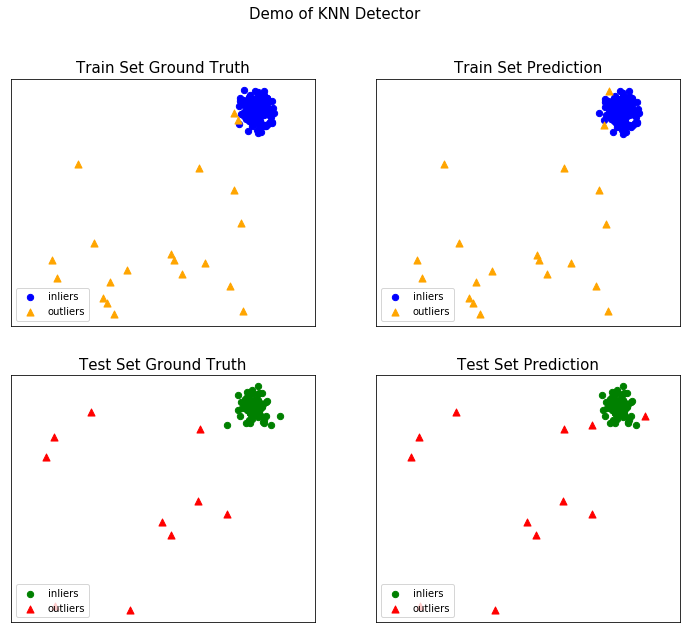

In [22]:
from pyod.utils.data import evaluate_print
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

In [19]:

# train kNN detector
clf_name = 'VAE'
clf = VAE([2,1],[1,2])
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            6           input_2[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 2)            6           dense_2[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 2)            0           dense_3[0][0]               

180/180 [==============================] - 0s 66us/step - loss: 2.2826 - val_loss: 3.2571
Epoch 33/100
180/180 [==============================] - 0s 66us/step - loss: 2.2917 - val_loss: 3.2151
Epoch 34/100
180/180 [==============================] - 0s 71us/step - loss: 2.2795 - val_loss: 3.1636
Epoch 35/100
180/180 [==============================] - 0s 70us/step - loss: 2.2553 - val_loss: 3.1674
Epoch 36/100
180/180 [==============================] - 0s 68us/step - loss: 2.2470 - val_loss: 3.2102
Epoch 37/100
180/180 [==============================] - 0s 69us/step - loss: 2.2911 - val_loss: 3.1684
Epoch 38/100
180/180 [==============================] - 0s 68us/step - loss: 2.2540 - val_loss: 3.1841
Epoch 39/100
180/180 [==============================] - 0s 70us/step - loss: 2.2459 - val_loss: 3.1991
Epoch 40/100
180/180 [==============================] - 0s 68us/step - loss: 2.2744 - val_loss: 3.1050
Epoch 41/100
180/180 [==============================] - 0s 68us/step - loss: 2.2604 - 


On Training Data:
VAE ROC:0.9861, precision @ rank n:0.9

On Test Data:
VAE ROC:1.0, precision @ rank n:1.0


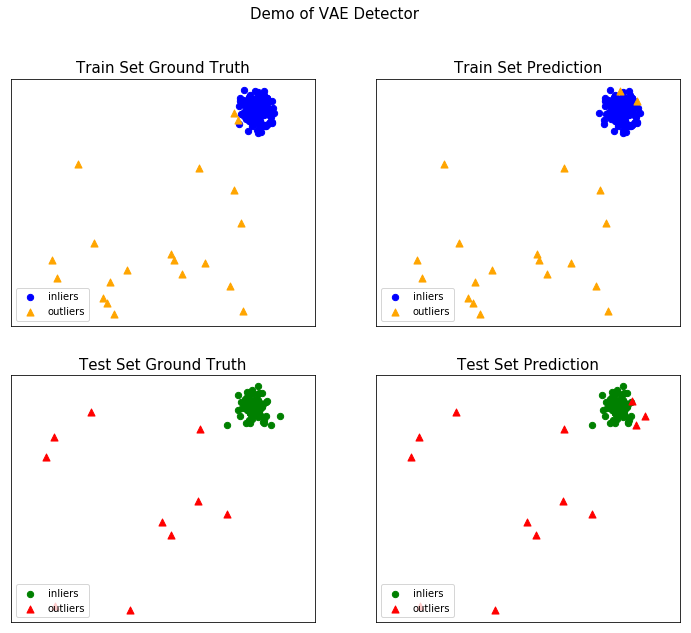

In [20]:
from pyod.utils.data import evaluate_print
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

In [6]:


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score



The number of training images : 16583, shape : (16583, 784)
The number of testing images : 2985, shape : (2985, 784)


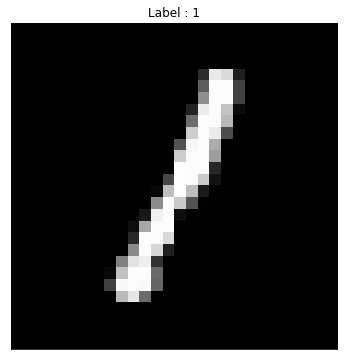

In [12]:
train_x = np.load('mnist_train_images.npy',allow_pickle=True)
train_y = np.load('mnist_train_labels.npy',allow_pickle=True)
test_x = np.load('mnist_test_images.npy',allow_pickle=True)
test_y = np.load('mnist_test_labels.npy',allow_pickle=True)

n_train = train_x.shape[0]
n_test = test_x.shape[0]

print ("The number of training images : {}, shape : {}".format(n_train, train_x.shape))
print ("The number of testing images : {}, shape : {}".format(n_test, test_x.shape))

#The number of training images : 16583, shape : (16583, 784)
#The number of testing images : 2985, shape : (2985, 784)

idx = np.random.randint(train_x.shape[0])
img = train_x[idx].reshape(28,28)

plt.figure(figsize = (6,6))
plt.imshow(img,'gray')
plt.title("Label : {}".format(np.argmax(train_y[idx,:])))
plt.xticks([])
plt.yticks([])
plt.show()



In [13]:
# Shape of input and latent variable

n_input = 28*28

# Encoder structure
n_encoder1 = 500
n_encoder2 = 300

n_latent = 2

# Decoder structure
n_decoder2 = 300
n_decoder1 = 500

In [14]:
# Shape of input and latent variable

n_input = 28*28

# Encoder structure
n_encoder1 = 500
n_encoder2 = 300

n_latent = 2

# Decoder structure
n_decoder2 = 300
n_decoder1 = 500

reg = MLPRegressor(hidden_layer_sizes = (n_encoder1, n_encoder2, n_latent, n_decoder2, n_decoder1), 
                   activation = 'tanh', 
                   solver = 'adam', 
                   learning_rate_init = 0.0001, 
                   max_iter = 20, 
                   tol = 0.0000001, 
                   verbose = True)

In [15]:


reg.fit(train_x, train_x)



Iteration 1, loss = 0.03301727
Iteration 2, loss = 0.02382030
Iteration 3, loss = 0.02276306
Iteration 4, loss = 0.02258900
Iteration 5, loss = 0.02255417
Iteration 6, loss = 0.02252894
Iteration 7, loss = 0.02251908
Iteration 8, loss = 0.02250115
Iteration 9, loss = 0.02247988
Iteration 10, loss = 0.02244466
Iteration 11, loss = 0.02237127
Iteration 12, loss = 0.02225735
Iteration 13, loss = 0.02215084
Iteration 14, loss = 0.02208543
Iteration 15, loss = 0.02205715
Iteration 16, loss = 0.02204387
Iteration 17, loss = 0.02203577
Iteration 18, loss = 0.02203359
Iteration 19, loss = 0.02202958
Iteration 20, loss = 0.02202608


/scinet/niagara/software/2019b/opt/base/python/3.8.5/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', hidden_layer_sizes=(500, 300, 2, 300, 500),
             learning_rate_init=0.0001, max_iter=20, tol=1e-07, verbose=True)

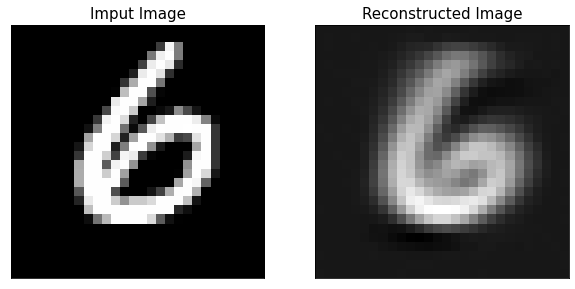

In [26]:
idx = np.random.randint(test_x.shape[0])
x_reconst = reg.predict(test_x[idx].reshape(-1,784))

plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.imshow(test_x[idx].reshape(28,28), 'gray')
plt.title('Imput Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(x_reconst.reshape(28,28), 'gray')
plt.title('Reconstructed Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()

In [18]:
#playing 

reg.coefs_[0]

array([[ 1.89005213e-05,  1.78853463e-04, -9.93599685e-04, ...,
         6.91855385e-05,  9.93607440e-05,  3.93647988e-03],
       [-1.02715649e-04, -6.52913154e-03, -9.51639675e-04, ...,
         1.29534758e-03, -3.89415145e-03, -1.52168420e-03],
       [-3.52219682e-03,  2.84106279e-04,  4.45674133e-03, ...,
         1.83024711e-03, -5.10367449e-04,  4.40691684e-06],
       ...,
       [ 1.62951820e-03,  5.35517861e-03, -1.96711022e-06, ...,
         1.24853690e-03, -1.26086407e-04,  7.59786829e-06],
       [ 1.04593960e-05,  3.80883368e-03,  5.18420154e-05, ...,
        -4.50783038e-03,  9.43847474e-05,  2.72753435e-03],
       [-6.35377652e-04,  5.73097436e-05,  5.88302964e-03, ...,
         3.44177873e-04, -1.76857000e-04, -1.94156437e-03]])

In [27]:
def encoder(data):
    data = np.asmatrix(data)
    
    encoder1 = data*reg.coefs_[0] + reg.intercepts_[0]
    encoder1 = (np.exp(encoder1) - np.exp(-encoder1))/(np.exp(encoder1) + np.exp(-encoder1))
    
    encoder2 = encoder1*reg.coefs_[1] + reg.intercepts_[1]
    encoder2 = (np.exp(encoder2) - np.exp(-encoder2))/(np.exp(encoder2) + np.exp(-encoder2))
    
    latent = encoder2*reg.coefs_[2] + reg.intercepts_[2]
    latent = (np.exp(latent) - np.exp(-latent))/(np.exp(latent) + np.exp(-latent))
    
    return np.asarray(latent)

In [93]:
np.argmax(test_y, axis = 1) == 5,0

(array([False, False,  True, ..., False,  True, False]), 0)

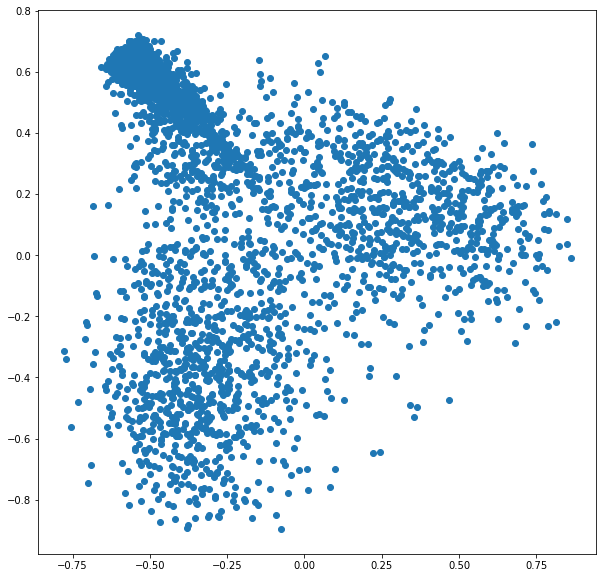

In [96]:

plt.figure(figsize = (10,10))
plt.scatter(test_latent[:,0],test_latent[:,1])

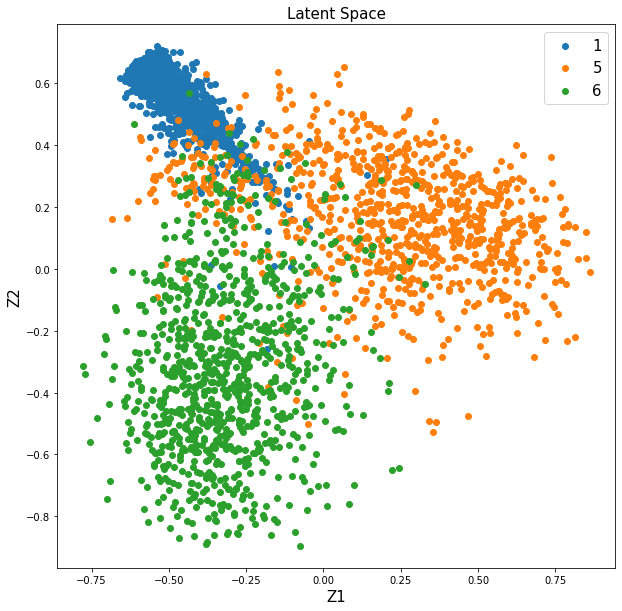

In [61]:


test_latent = encoder(test_x)

plt.figure(figsize = (10,10))
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 1,0], test_latent[np.argmax(test_y, axis = 1) == 1,1], label = '1')
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 5,0], test_latent[np.argmax(test_y, axis = 1) == 5,1], label = '5')
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 6,0], test_latent[np.argmax(test_y, axis = 1) == 6,1], label = '6')
plt.title('Latent Space', fontsize=15)
plt.xlabel('Z1', fontsize=15)
plt.ylabel('Z2', fontsize=15)
plt.legend(fontsize = 15)
plt.axis('equal')
plt.show()



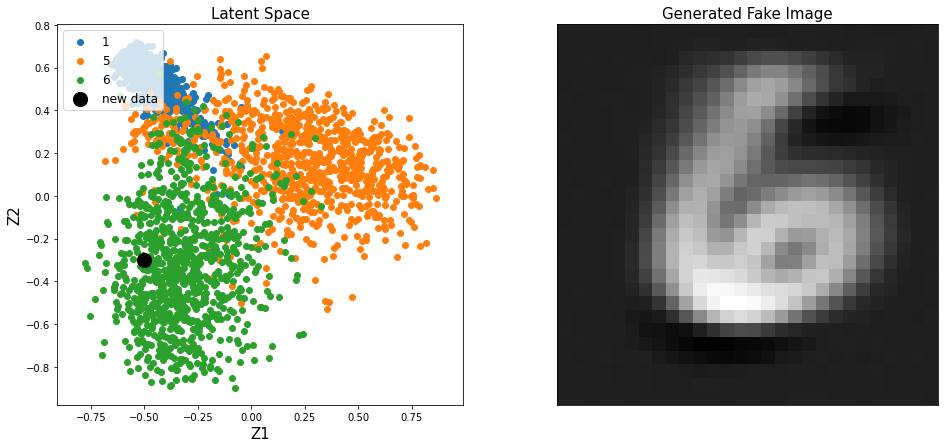

In [33]:
def decoder(new_data):
    new_data = np.asmatrix(new_data)
    decoder2 = new_data*reg.coefs_[3] + reg.intercepts_[3]
    decoder2 = (np.exp(decoder2) - np.exp(-decoder2))/(np.exp(decoder2) + np.exp(-decoder2))

    decoder1 = decoder2*reg.coefs_[4] + reg.intercepts_[4]
    decoder1 = (np.exp(decoder1) - np.exp(-decoder1))/(np.exp(decoder1) + np.exp(-decoder1))

    reconst = decoder1*reg.coefs_[5] + reg.intercepts_[5]
    reconst = (np.exp(reconst) - np.exp(-reconst))/(np.exp(reconst) + np.exp(-reconst))

    return np.asarray(reconst)

latent = np.array([[-0.5, -0.3]])
reconst = decoder(latent)

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 1,0], test_latent[np.argmax(test_y, axis = 1) == 1,1], label = '1')
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 5,0], test_latent[np.argmax(test_y, axis = 1) == 5,1], label = '5')
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 6,0], test_latent[np.argmax(test_y, axis = 1) == 6,1], label = '6')
plt.scatter(latent[:,0], latent[:,1], c = 'k', marker = 'o', s = 200, label = 'new data')
plt.title('Latent Space', fontsize = 15)
plt.xlabel('Z1', fontsize = 15)
plt.ylabel('Z2', fontsize = 15)
plt.legend(loc = 2, fontsize = 12)
plt.axis('equal')
plt.subplot(1,2,2)
plt.imshow(reconst.reshape(28,28), 'gray')
plt.title('Generated Fake Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()



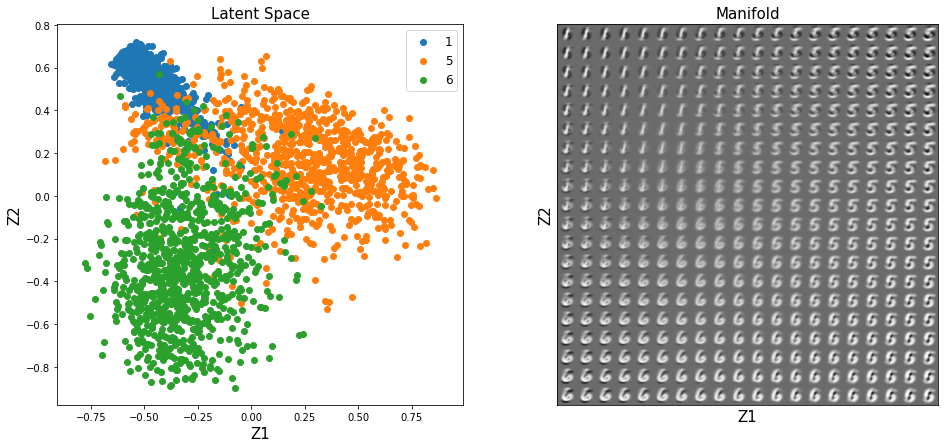

In [34]:
# Initialize canvas
nx = 20
ny = 20
x_values = np.linspace(-1, 1, nx)
y_values = np.linspace(-1, 1, ny)
canvas = np.empty((28*ny, 28*nx))

for i, yi in enumerate(y_values):
        for j, xi in enumerate(x_values):
            latent = np.array([[xi, yi]])
            reconst = decoder(latent)
            canvas[(nx-i-1)*28:(nx-i)*28,j*28:(j+1)*28] = reconst.reshape(28, 28)

plt.figure(figsize = (16, 7))
plt.subplot(1,2,1)
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 1,0], test_latent[np.argmax(test_y, axis = 1) == 1,1], label = '1')
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 5,0], test_latent[np.argmax(test_y, axis = 1) == 5,1], label = '5')
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 6,0], test_latent[np.argmax(test_y, axis = 1) == 6,1], label = '6')
plt.title('Latent Space', fontsize = 15)
plt.xlabel('Z1', fontsize = 15)
plt.ylabel('Z2', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.subplot(1,2,2)
plt.imshow(canvas, 'gray')
plt.title('Manifold', fontsize = 15)
plt.xlabel('Z1', fontsize = 15)
plt.ylabel('Z2', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()

In [57]:
>>> import numpy as np
>>> from sklearn.base import BaseEstimator, ClassifierMixin
>>> from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
>>> from sklearn.utils.multiclass import unique_labels
>>> from sklearn.metrics import euclidean_distances


>>> class TemplateClassifier(BaseEstimator, ClassifierMixin):
...
...     def __init__(self, demo_param='demo'):
...         self.demo_param = demo_param
...
...     def fit(self, X,y):
...
...         self.classes_ = unique_labels(y)
...
...         self.X_ = X
...         self.y_ = y
...         # Return the classifier
...         return self
...
...     def predict(self, X):
...
...         # Check is fit had been called
...         check_is_fitted(self)
...
...         # Input validation
...         X = check_array(X)
...
...         closest = np.argmin(euclidean_distances(X, self.X_), axis=1)
...         return self.y_[closest]

In [78]:
x=TemplateClassifier()
x.fit(train_x,train_y)
y = x.predict(test_x)
y.shape
import sklearn.metrics
accuracy_score(test_y,y)

0.9943048576214405

In [105]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances


class TemplateClassifierr(BaseEstimator, ClassifierMixin):

    def __init__(self, demo_param='demo'):
        self.demo_param = demo_param

    def fit(self, X,y):

        self.classes_ = unique_labels(y)


        # Shape of input and latent variable

        n_input = 28*28

        # Encoder structure
        n_encoder1 = 500
        n_encoder2 = 300

        n_latent = 2

        # Decoder structure
        n_decoder2 = 300
        n_decoder1 = 500

        self.reg = MLPRegressor(hidden_layer_sizes = (n_encoder1, n_encoder2, n_latent, n_decoder2, n_decoder1), 
                           activation = 'tanh', 
                           solver = 'adam', 
                           learning_rate_init = 0.0001, 
                           max_iter = 20, 
                           tol = 0.0000001, 
                           verbose = True)

        self.latent=encoder(X)
         # Return the classifier
        return self

    def predict(self, X):

            # Check is fit had been called
            check_is_fitted(self)
            self.P_latent=encoder(X)
            a=[self.latent[:,1].mean(),self.latent[:,0].mean()]
            b=[self.P_latent[:,1].mean(),self.P_latent[:,0].mean()]
            from scipy.spatial import distance




            return distance.braycurtis(a,b)> 

    def encoder(self,data):
        data = np.asmatrix(data)

        encoder1 = data*self.reg.coefs_[0] + self.reg.intercepts_[0]
        encoder1 = (np.exp(encoder1) - np.exp(-encoder1))/(np.exp(encoder1) + np.exp(-encoder1))

        encoder2 = encoder1*self.reg.coefs_[1] + self.reg.intercepts_[1]
        encoder2 = (np.exp(encoder2) - np.exp(-encoder2))/(np.exp(encoder2) + np.exp(-encoder2))

        latent = encoder2*self.reg.coefs_[2] + self.reg.intercepts_[2]
        latent = (np.exp(latent) - np.exp(-latent))/(np.exp(latent) + np.exp(-latent))

        return np.asarray(latent)

In [111]:
x=TemplateClassifierr()
x.fit(train_x,train_y)
y = x.predict(test_x[1])
y

0.5231586802176696